<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/Covid_19(INDIA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
# Starting analysis with India dataset

IndiaData = pd.read_csv('/content/drive/MyDrive/Google Colab Data /covid_19_india.csv')
IndiaData.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
# checking the state of corona virus state wise
statesCases = pd.Series(IndiaData['State/UnionTerritory'])
confirmedCases = pd.Series(IndiaData['ConfirmedIndianNational']).replace("-","0")
deathCases = pd.Series(IndiaData['Deaths'])
curedCases = pd.Series(IndiaData['Cured'])
AllConfirmed = pd.Series(IndiaData['Confirmed'])

In [6]:
statusDF = pd.concat([statesCases, confirmedCases, deathCases, curedCases, AllConfirmed], axis=1)

IndianConfirmedStatus = statusDF.astype({"ConfirmedIndianNational":"int32"})
IndianConfirmedStatus
# IndianStatus.astype({"ConfirmedIndianNational":"int32"}).dtypes

,State/UnionTerritory,ConfirmedIndianNational,Deaths,Cured,Confirmed
0,Kerala,1,0,0,1
1,Kerala,1,0,0,1
2,Kerala,2,0,0,2
3,Kerala,3,0,0,3
4,Kerala,3,0,0,3
...,...,...,...,...,...
9286,Telengana,0,1480,266120,275261
9287,Tripura,0,373,32169,32945
9288,Uttarakhand,0,1307,72435,79141
9289,Uttar Pradesh,0,7967,528832,558173


In [7]:
# Let's find out the details of all different cities
pickCityNames = list(set(IndianConfirmedStatus['State/UnionTerritory']))

In [8]:
# finding cured cases based on these names # creating DF from dict
curedCases = {}
noOfCured = []
finalCuredDict = {}


for cityNames in pickCityNames:
    sumCured = IndianConfirmedStatus.loc[IndianConfirmedStatus["State/UnionTerritory"] == cityNames, "Cured"].sum()
#     print(cityNames, sumCured)
    noOfCured.append(sumCured)
    
    
    curedCases[cityNames] = sumCured
    
    for key, values in curedCases.items():
        finalCuredDict["Cured"]=curedCases

In [9]:
# creating DF
CuredDF = pd.DataFrame(finalCuredDict)
CuredDF

,Cured
Andaman and Nicobar Islands,430671
Andhra Pradesh,76025563
Arunachal Pradesh,1084070
Assam,18920926
Bihar,21690764
Cases being reassigned to states,0
Chandigarh,1181720
Chandigarh***,14381
Chhattisgarh,13106333
Dadar Nagar Haveli,14


In [10]:
# finding confirmed cases based on these names # creating DF from dict
conCases = {}
noOfCon = []
# finalCuredDict = {}


for cityNames in pickCityNames:
    sumCon = IndianConfirmedStatus.loc[IndianConfirmedStatus["State/UnionTerritory"] == cityNames, "Confirmed"].sum()
#     print(cityNames, sumCon)
    noOfCon.append(sumCon)
    
    
    conCases[cityNames] = sumCon
    
    for key, values in conCases.items():
        finalCuredDict["Confirmed"]=conCases


In [11]:
# finding death cases based on these names # creating DF from dict
DCases = {}
noOfDeaths = []
# finalCuredDict = {}


for cityNames in pickCityNames:
    sumDeaths = IndianConfirmedStatus.loc[IndianConfirmedStatus["State/UnionTerritory"] == cityNames, "Deaths"].sum()
#     print(cityNames, sumDeaths)
    noOfDeaths.append(sumDeaths)
    
    
    DCases[cityNames] = sumDeaths
    
    for key, values in DCases.items():
        finalCuredDict["Deaths"]=DCases

In [12]:
# find indians among the confirmed cases.
indiansCases = {}
noOfConfirmedIndians = []
# finalCuredDict = {}


for cityNames in pickCityNames:
    sumIndianConfirmed = IndianConfirmedStatus.loc[IndianConfirmedStatus["State/UnionTerritory"] == cityNames, "ConfirmedIndianNational"].sum()
#     print(cityNames, sumDeaths)
    noOfConfirmedIndians.append(sumIndianConfirmed)
    
    
    indiansCases[cityNames] = sumIndianConfirmed
    
    for key, values in DCases.items():
        finalCuredDict["ConfirmedIndianNationals"]=indiansCases

In [13]:
finalCuredDict

{'Confirmed': {'Andaman and Nicobar Islands': 483761,
  'Andhra Pradesh': 84815303,
  'Arunachal Pradesh': 1314087,
  'Assam': 21703581,
  'Bihar': 23891385,
  'Cases being reassigned to states': 345565,
  'Chandigarh': 1387878,
  'Chandigarh***': 15636,
  'Chhattisgarh': 16051609,
  'Dadar Nagar Haveli': 186,
  'Dadra and Nagar Haveli and Daman and Diu': 384618,
  'Daman & Diu': 2,
  'Delhi': 46445978,
  'Goa': 4248741,
  'Gujarat': 20788858,
  'Haryana': 18060806,
  'Himachal Pradesh': 2354421,
  'Jammu and Kashmir': 9870504,
  'Jharkhand': 9912089,
  'Karnataka': 79354749,
  'Kerala': 36407056,
  'Ladakh': 680539,
  'Madhya Pradesh': 17544637,
  'Maharashtra': 179450627,
  'Maharashtra***': 1723135,
  'Manipur': 1788562,
  'Meghalaya': 849874,
  'Mizoram': 284581,
  'Nagaland': 918755,
  'Odisha': 27395482,
  'Puducherry': 3334604,
  'Punjab': 13339280,
  'Punjab***': 140605,
  'Rajasthan': 20941444,
  'Sikkim': 399767,
  'Tamil Nadu': 82789540,
  'Telangana': 1077182,
  'Telangana*

In [14]:
NewDf = pd.DataFrame(finalCuredDict)
NewDf

,Cured,Confirmed,Deaths,ConfirmedIndianNationals
Punjab,11408678,13339280,403512,231
Tamil Nadu,74243503,82789540,1291048,138
Kerala,28915377,36407056,132008,1091
Mizoram,227248,284581,159,4
Punjab***,130406,140605,4428,0
Jammu and Kashmir,8215873,9870504,158081,95
Jharkhand,8663649,9912089,87762,0
Telangana,681436,1077182,13342,0
Uttar Pradesh,43431970,50283822,756398,462
Goa,3715236,4248741,55207,9


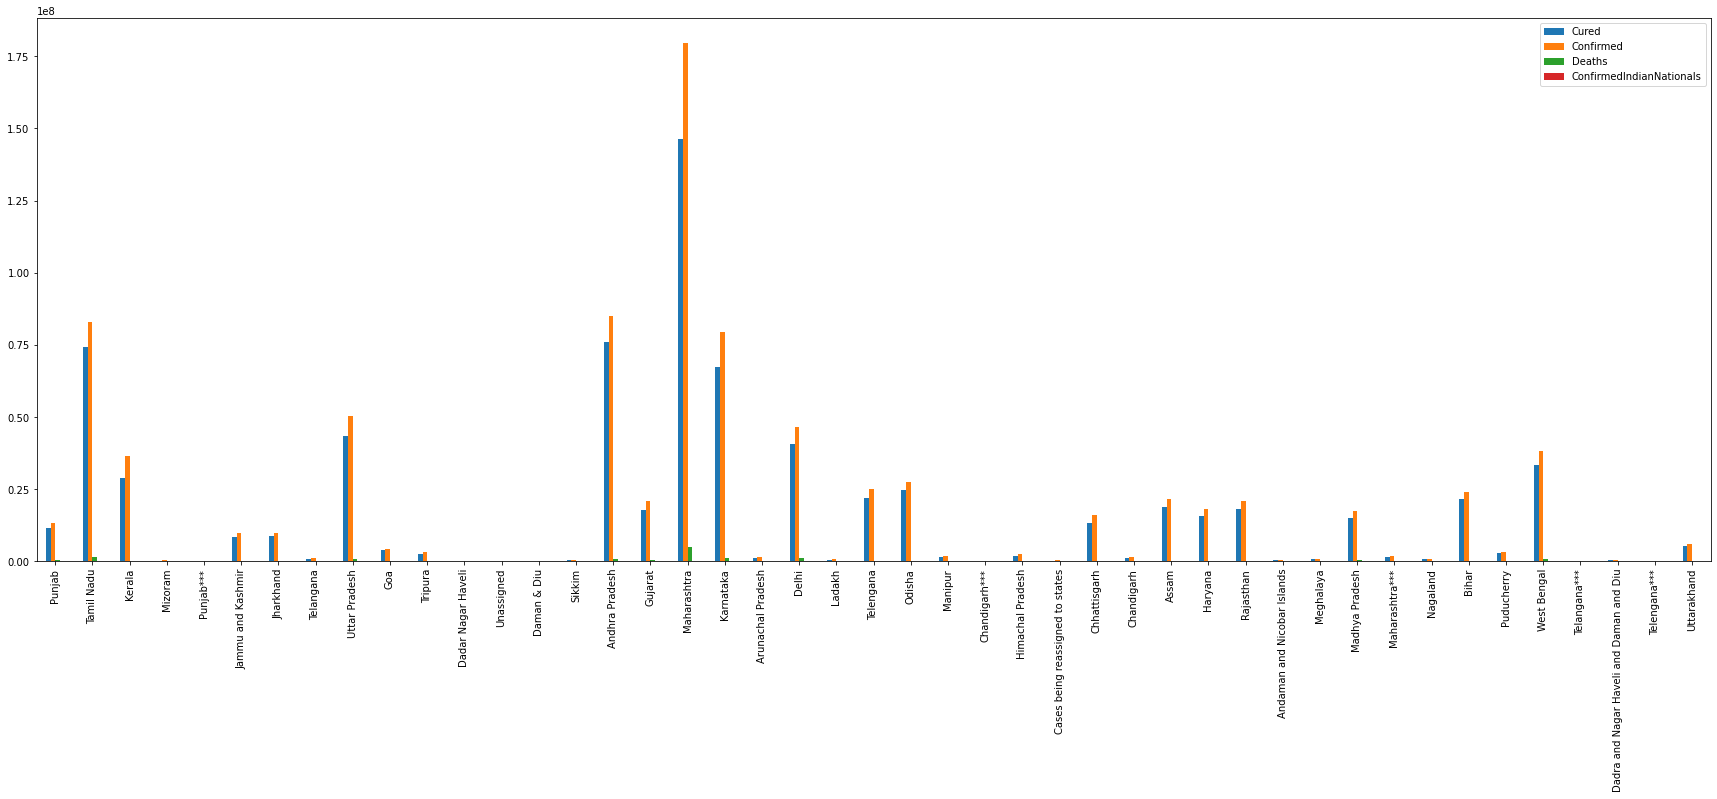

In [15]:
NewDf.plot.bar(rot=90, figsize=(30,10))